In [1]:
from larcv import larcv
larcv.load_pyutil
larcv.load_cvutil

import cv2
import ROOT
from ROOT import fcllite
from ROOT import geo2d
from ROOT import larocv
from ROOT import std

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
proc = larcv.ProcessDriver('ProcessDriver')

CFG="../reco_track.cfg"
print "Loading config... ",CFG
proc.configure(CFG)

flist=ROOT.std.vector('std::string')()
flist.push_back("../numu_8000.root")
proc.override_input_file(flist)

filter_id = proc.process_id("NuFilter")
mcinfo_id = proc.process_id("LArbysImageMC")
reco_id   = proc.process_id("LArbysImage")
ana_id    = proc.process_id("LArbysImageAna")

filter_proc   = proc.process_ptr(filter_id)
mcinfo_proc   = proc.process_ptr(mcinfo_id)
mcinfo_proc.SetFilter(filter_proc)

larbysimg     = proc.process_ptr(reco_id)
larbysimg_ana = proc.process_ptr(ana_id)
larbysimg_ana.SetManager(larbysimg.Manager())

proc.override_ana_file("/tmp/test.root")

proc.initialize()
#15 is v-shape

proc.batch_process(15,1)

# for event in xrange(10):
#     proc.batch_process(event+1,1)
#     if (filter_proc.selected()==False): continue
#     print event
#     break


Loading config...  ../reco_track.cfg


In [3]:
mgr=larbysimg.Manager()
img_v = []
track_img_v=[]
shower_img_v=[]
pygeo = geo2d.PyDraw()
for mat in mgr.InputImages(0):
    img_v.append(pygeo.image(mat))
for mat in mgr.InputImages(1):
    track_img_v.append(pygeo.image(mat))
for mat in mgr.InputImages(2):
    shower_img_v.append(pygeo.image(mat))

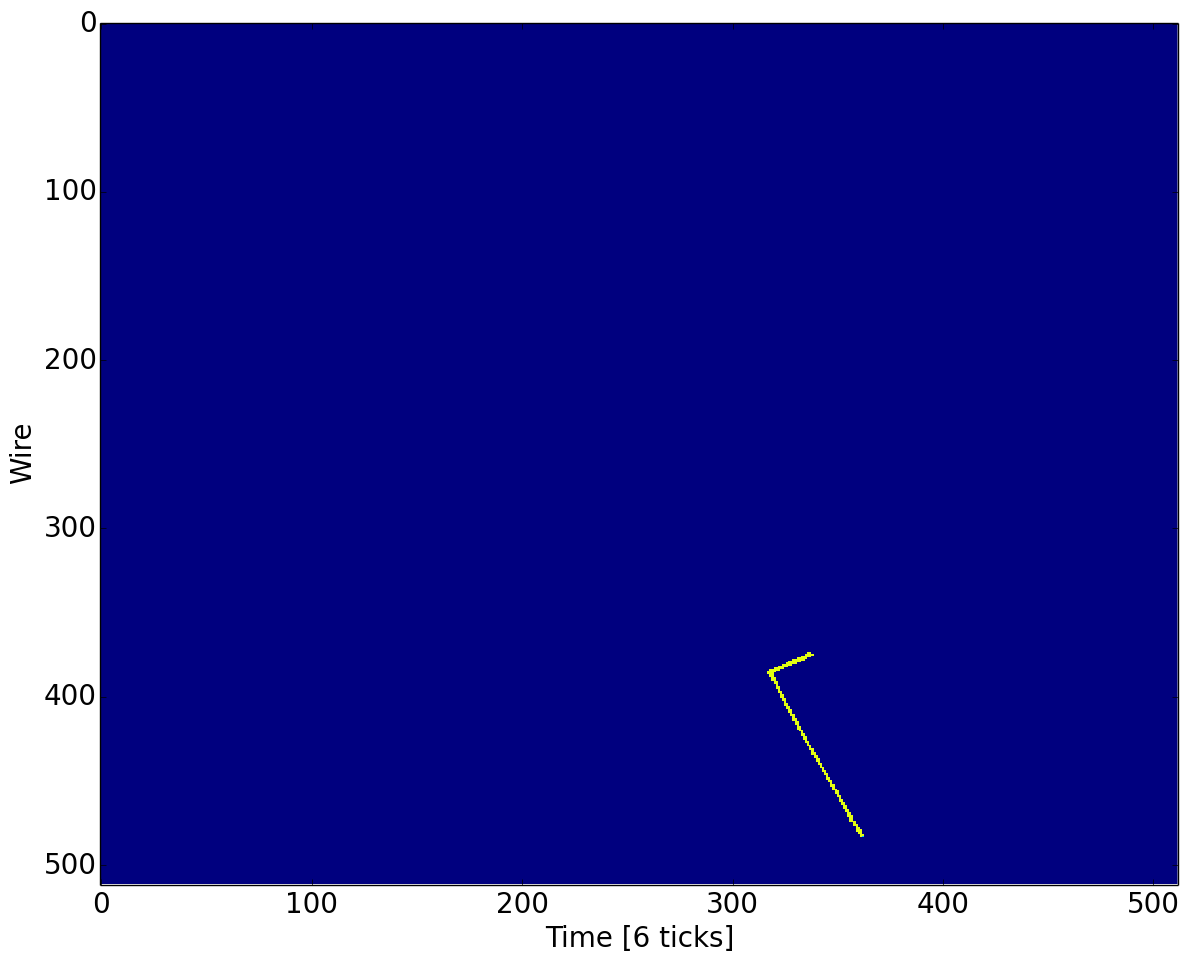

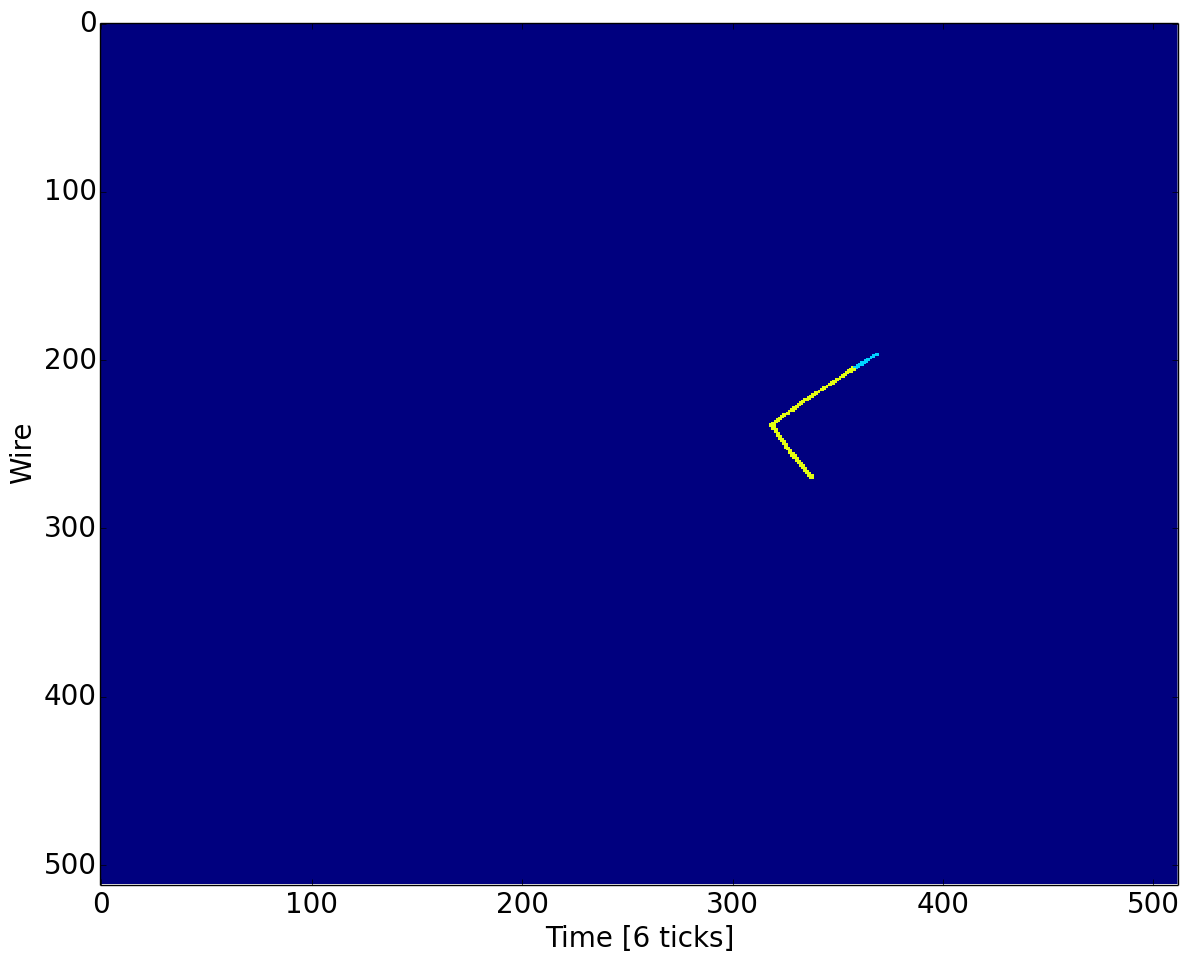

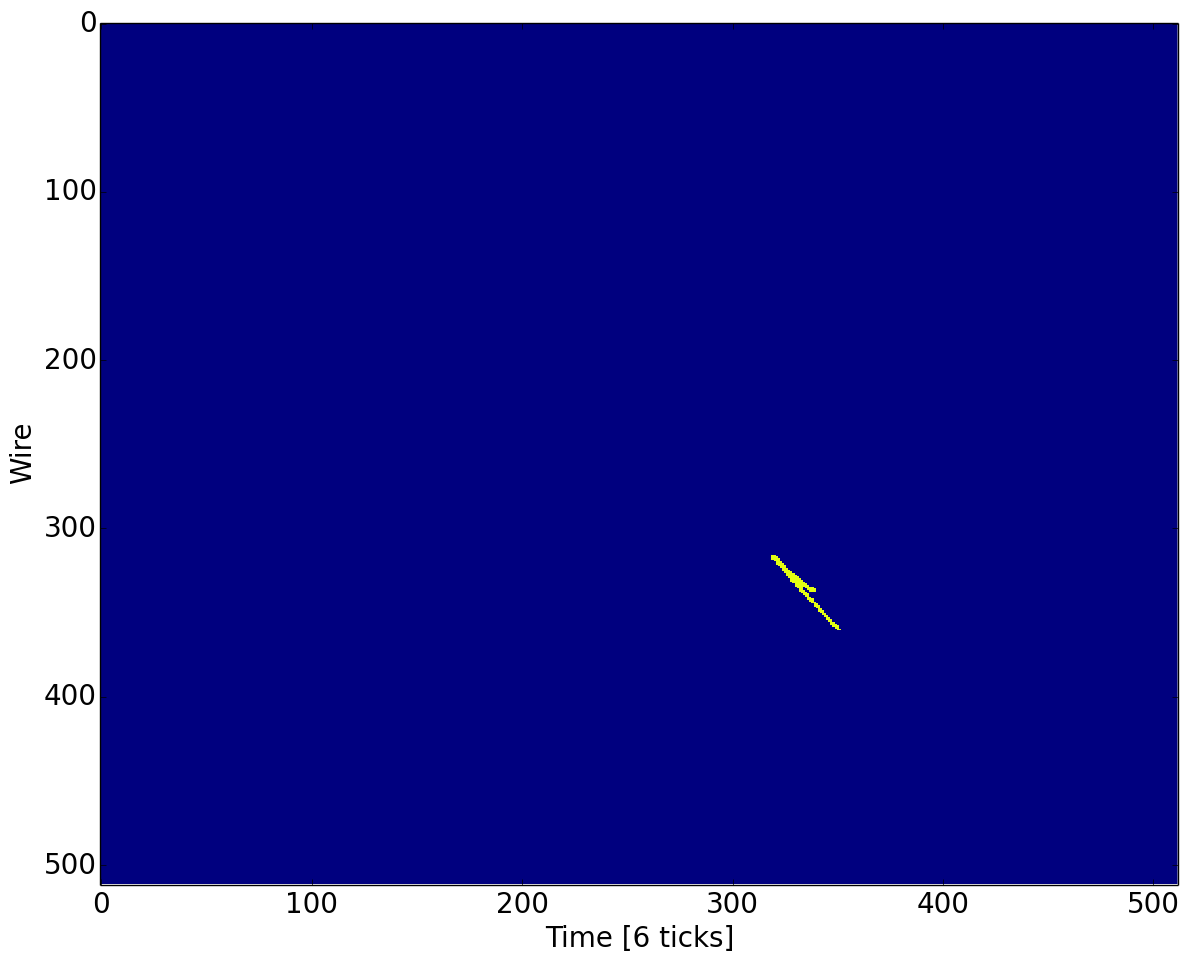

In [4]:
for plane in xrange(len(track_img_v)):                                                                                                    
        shower_img=np.where(shower_img_v[plane]>10.0,85.0,0.0).astype(np.uint8)                                                                 
        track_img=np.where(track_img_v[plane]>10.0,160.0,0.0).astype(np.uint8)                                                                  
        fig,ax=plt.subplots(figsize=(12,12),facecolor='w')                                                                                      
        plt.imshow(shower_img+track_img,cmap='jet',interpolation='none',vmin=0.,vmax=255.)                                                      
        plt.xlabel('Time [6 ticks]',fontsize=20)                                                                                                
        plt.ylabel('Wire',fontsize=20)                                                                                                          
        plt.tick_params(labelsize=20)                                                                                                           
        ax.set_aspect(0.8)                                                                                                                      
        plt.tight_layout()        
        plt.show()

Plane 0


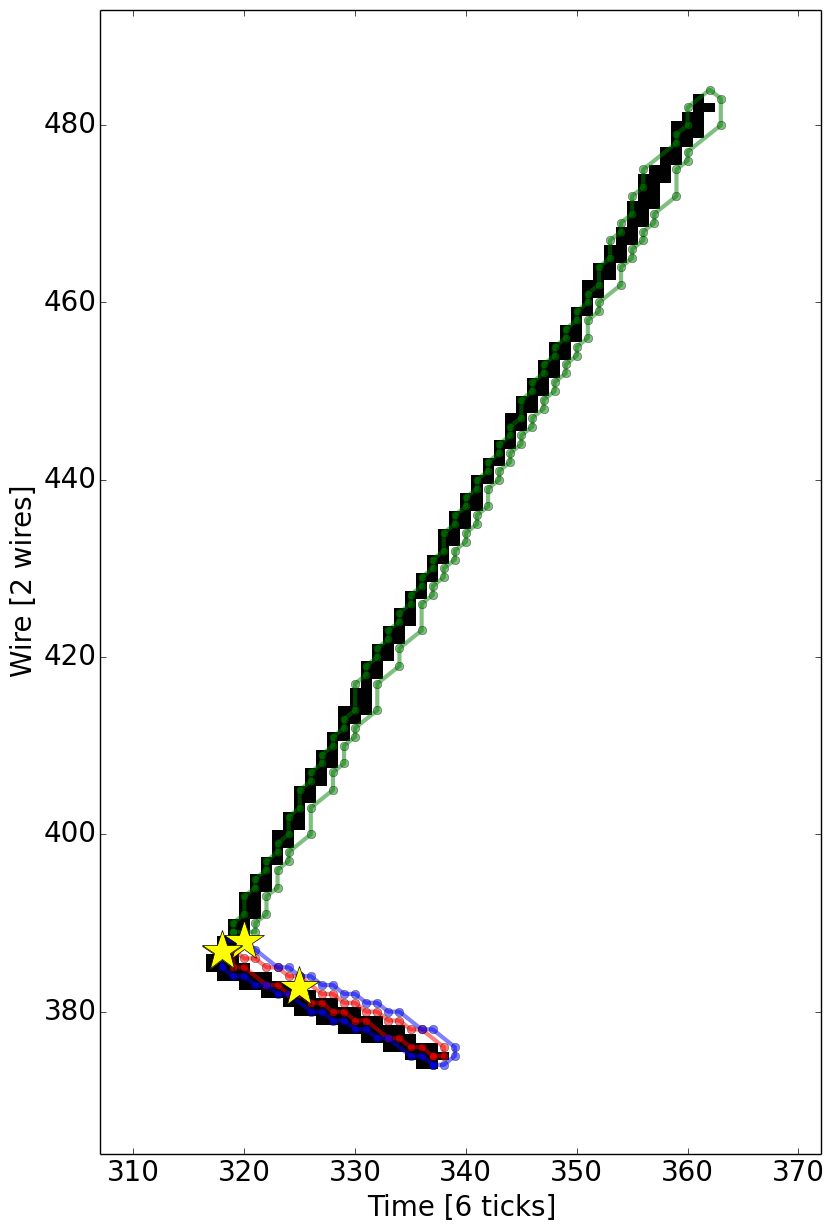

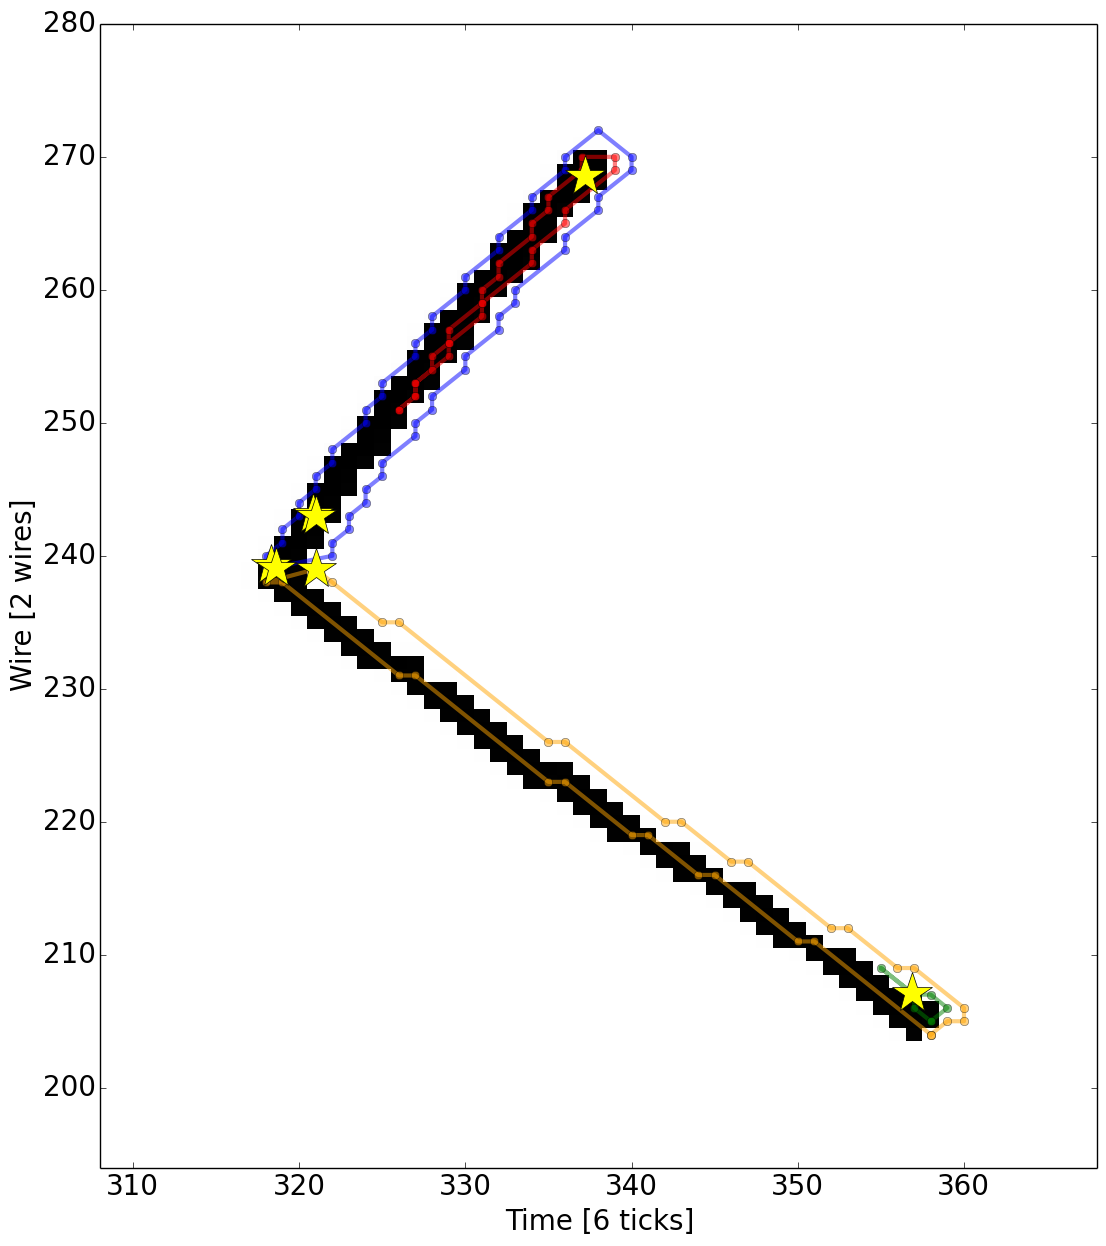

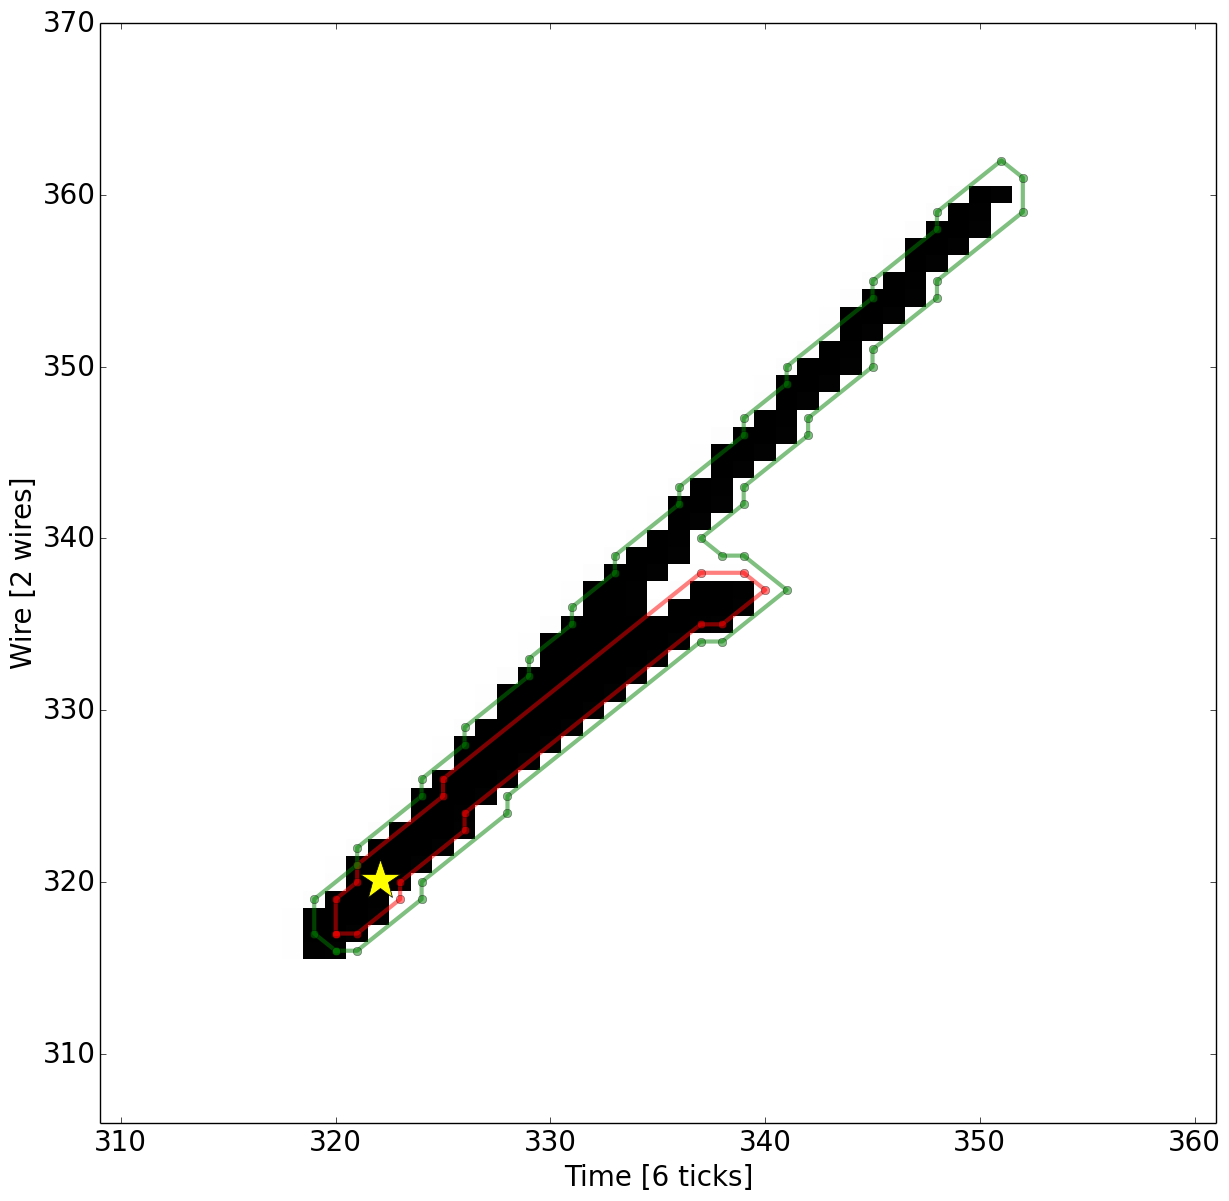

In [5]:
colors=['red','green','blue','orange','magenta','cyan','pink']
colors*=10
plane=0
print 'Plane',plane
for plane in xrange(3):
    fig,ax=plt.subplots(figsize=(12,12),facecolor='w')

    shape_img = track_img_v[plane]
    shape_img=np.where(track_img_v[plane]>0.0,1.0,0.0).astype(np.uint8)
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)

    dm=mgr.DataManager()

    ix=0

    vertex_seeds_v = dm.Data(1,plane).as_vector()
    cluscomp_v     = dm.Data(1,3+plane).as_vector()

    #plot the atomics
    for cluscomp_id in xrange(cluscomp_v.size()):
        cluscomp = cluscomp_v[cluscomp_id]
        for atomic_id in xrange(cluscomp.size()):
            atomic = cluscomp[atomic_id]
            pts=[[atomic[p_id].x,atomic[p_id].y] for p_id in xrange(atomic.size())]
            pts.append(pts[0])
            pts=np.array(pts)
            plt.plot(pts[:,0],pts[:,1],'-o',lw=3,color=colors[ix], alpha = 0.5)
            ix+=1


    pts_v = np.array([[vertex_seeds_v[i].x,
                       vertex_seeds_v[i].y] for i in xrange(vertex_seeds_v.size())])
    if pts_v.size>0:
        plt.plot(pts_v[:,0],pts_v[:,1],'*',markersize=30,color='yellow')

    ax.set_aspect(1.0)
    plt.tight_layout()
    ax.set_ylim(np.min(nz_pixels[0])-10,np.max(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    plt.xlabel('Time [6 ticks]',fontsize=20)
    plt.ylabel('Wire [2 wires]',fontsize=20)
    plt.tick_params(labelsize=20)
    ax.set_aspect(0.8)
    #ax.text(150,300,"Yellow == Defect Seed\nOrange == PCA Seed",fontsize=30,fontweight='bold')
    plt.show()

In [20]:
dm = mgr.DataManager()
data = dm.Data(2,0).as_vector()
# print data[0].num_planes
print data[1].vtx2d_v[0].pt.x
print data.size()

333.26361084
3


Plane 0


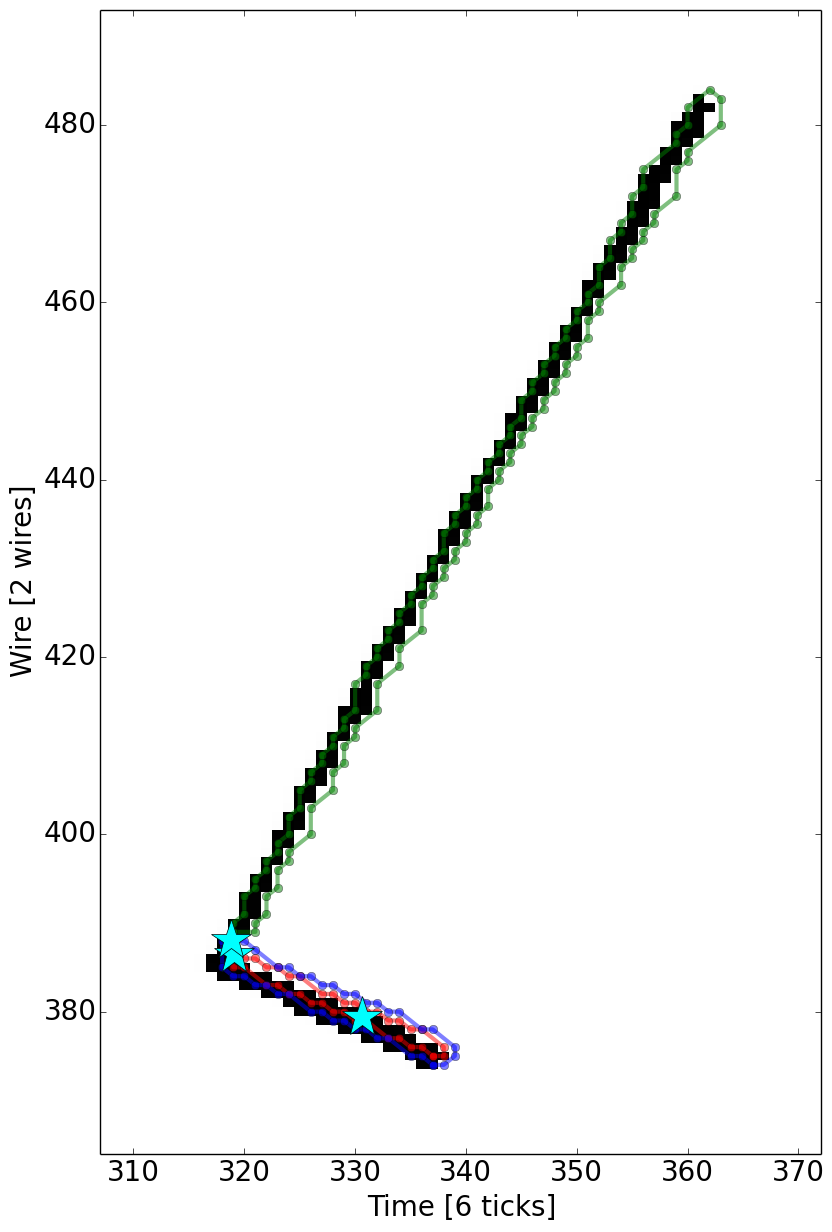

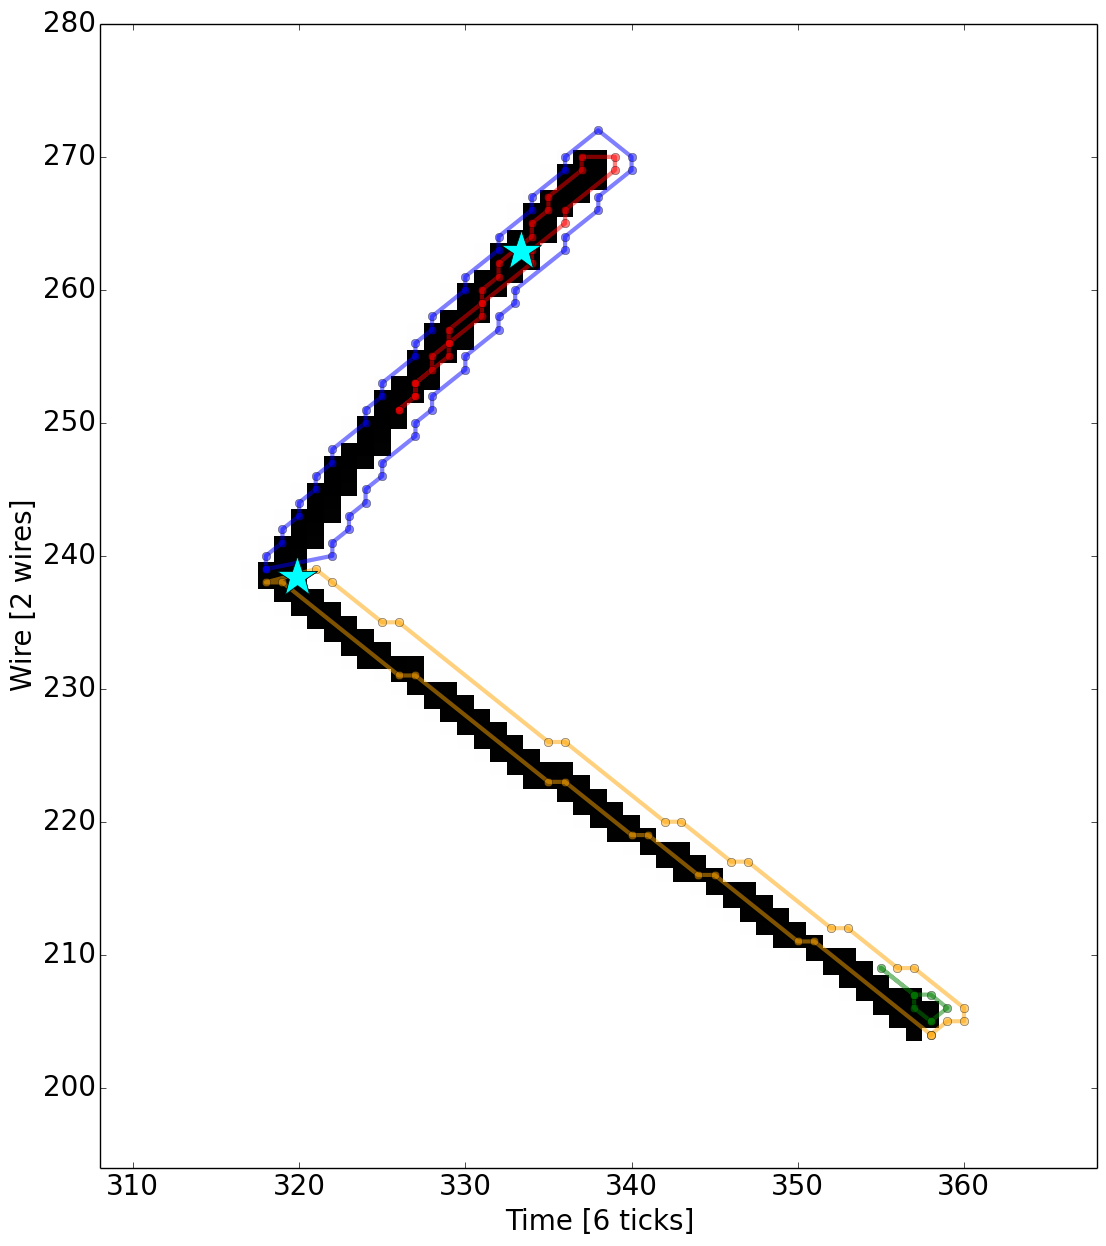

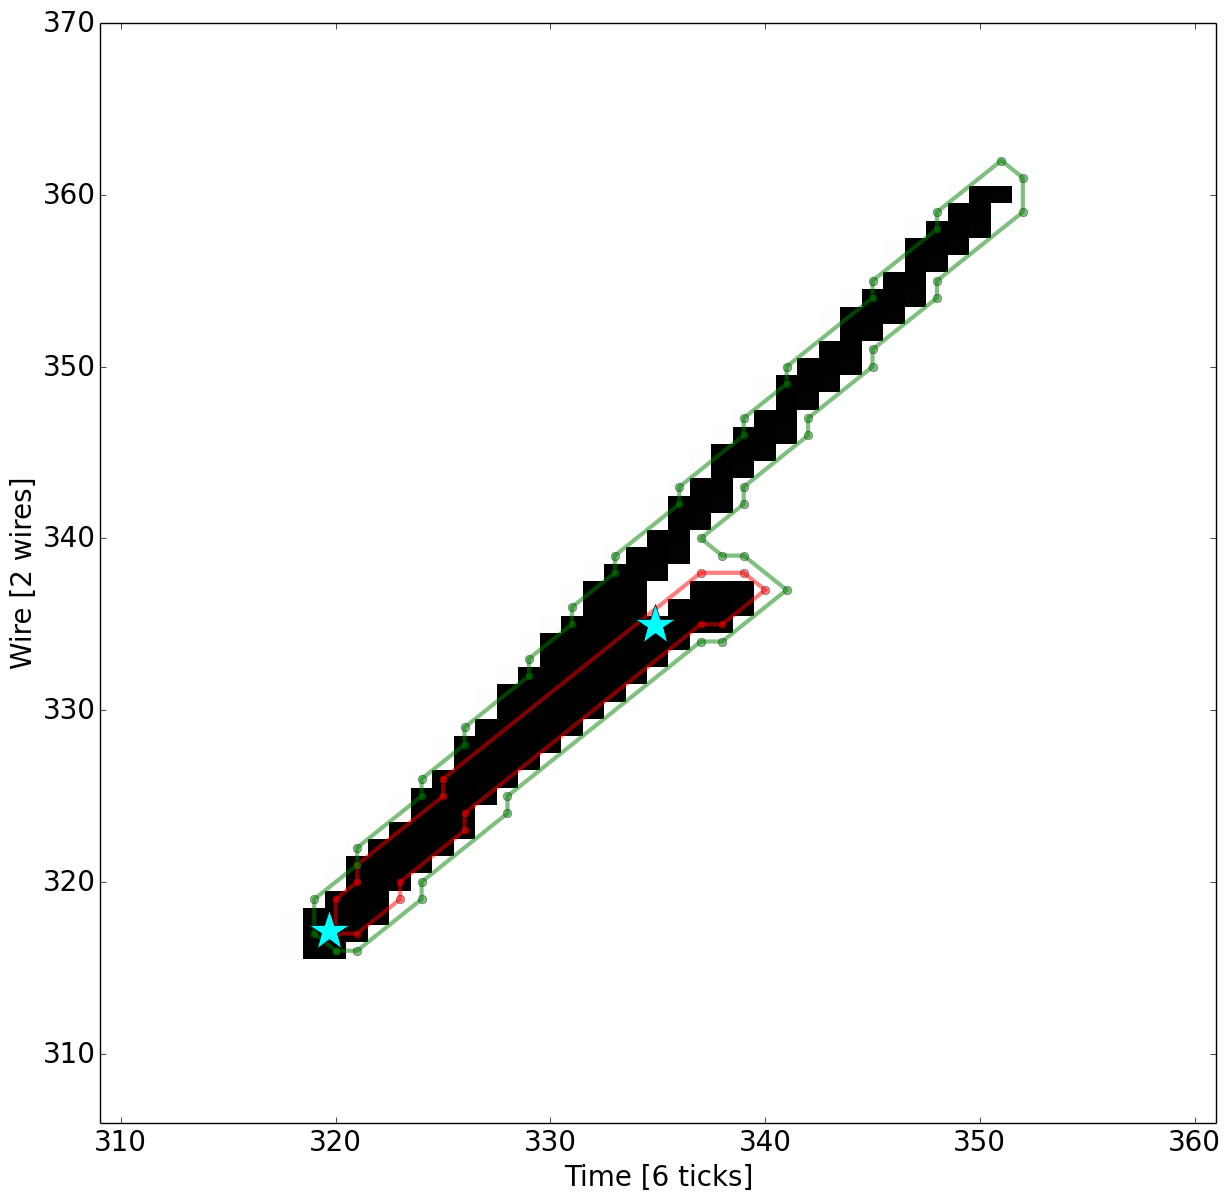

In [27]:
colors=['red','green','blue','orange','magenta','cyan','pink']
colors*=10
plane=0
print 'Plane',plane
for plane in xrange(3):
    fig,ax=plt.subplots(figsize=(12,12),facecolor='w')

    shape_img = track_img_v[plane]
    shape_img=np.where(track_img_v[plane]>0.0,1.0,0.0).astype(np.uint8)
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)

    dm=mgr.DataManager()

    ix=0

    vertex_vv = dm.Data(2,0).as_vector()
    cluscomp_v     = dm.Data(1,3+plane).as_vector()

#    plot the atomics
    for cluscomp_id in xrange(cluscomp_v.size()):
        cluscomp = cluscomp_v[cluscomp_id]
        for atomic_id in xrange(cluscomp.size()):
            atomic = cluscomp[atomic_id]
            pts=[[atomic[p_id].x,atomic[p_id].y] for p_id in xrange(atomic.size())]
            pts.append(pts[0])
            pts=np.array(pts)
            plt.plot(pts[:,0],pts[:,1],'-o',lw=3,color=colors[ix], alpha = 0.5)
            ix+=1


    pts_v = np.array([[vertex_vv[i].cvtx2d_v[plane].center.x,
                       vertex_vv[i].cvtx2d_v[plane].center.y] for i in xrange(vertex_vv.size())])
    if pts_v.size>0:
        plt.plot(pts_v[:,0],pts_v[:,1],'*',markersize=30,color='cyan')

            
            

    ax.set_aspect(1.0)
    plt.tight_layout()
    ax.set_ylim(np.min(nz_pixels[0])-10,np.max(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    plt.xlabel('Time [6 ticks]',fontsize=20)
    plt.ylabel('Wire [2 wires]',fontsize=20)
    plt.tick_params(labelsize=20)
    ax.set_aspect(0.8)
    #ax.text(150,300,"Yellow == Defect Seed\nOrange == PCA Seed",fontsize=30,fontweight='bold')
    plt.show()

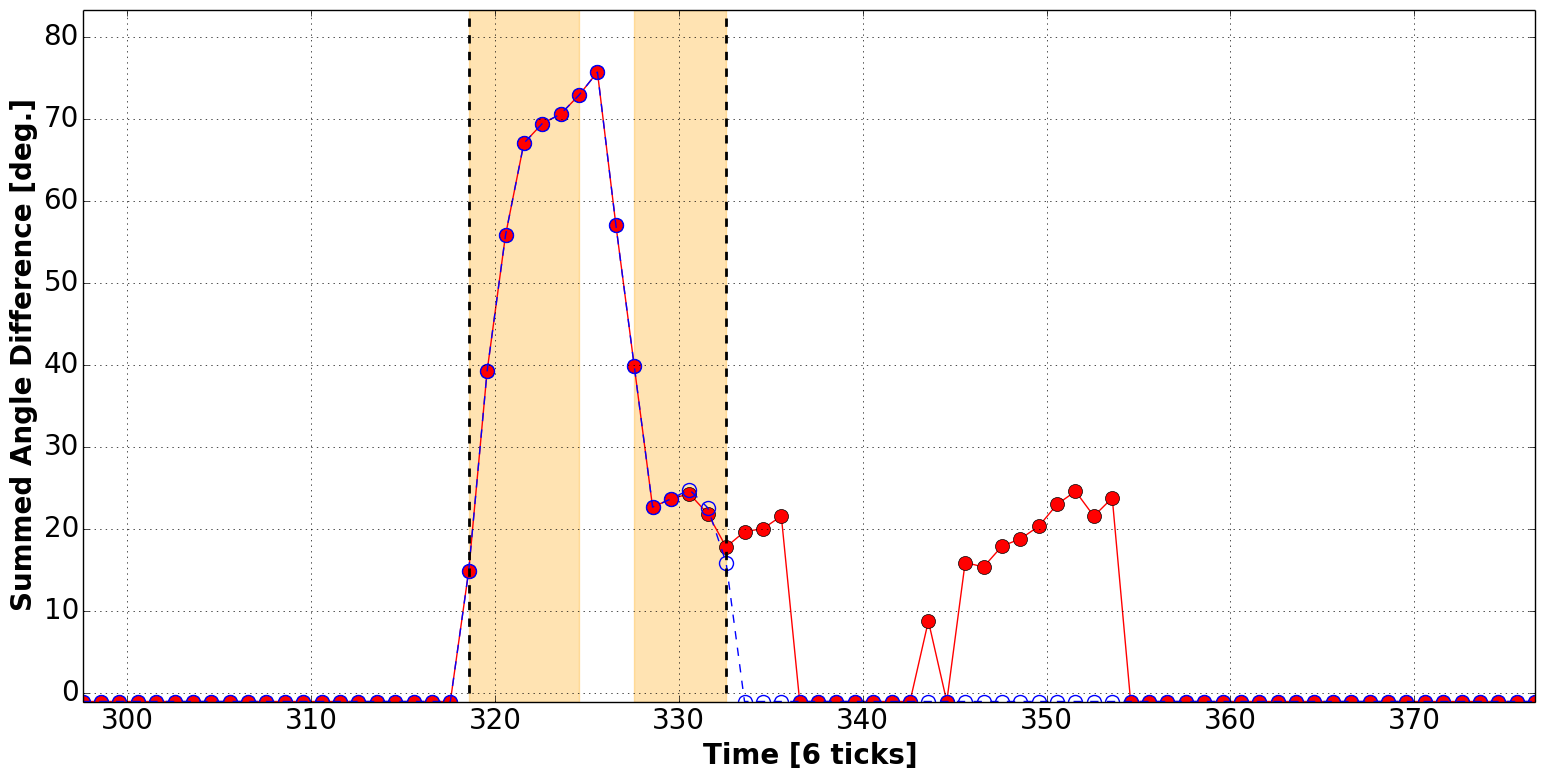

In [30]:
import matplotlib.patches as patches
alg=mgr.GetClusterAlg(2).Algo()

tickscore0_y=[]
tickscore0_x=[]

score0_v = alg.TimeBinnedScore0Mean()
for idx in xrange(score0_v.size()):
    v = score0_v[idx]
    tickscore0_y.append(v)
    tickscore0_x.append(idx*1 + alg.TimeBinMin())
        
tickscore1_y=[]
tickscore1_x=[]
score1_v = alg.TimeBinnedScore1Mean()
for idx in xrange(score1_v.size()):
    v = score1_v[idx]
    tickscore1_y.append(v)
    tickscore1_x.append(idx*1 + alg.TimeBinMin())

tickscore0_x = np.array(tickscore0_x)
tickscore0_y = np.array(tickscore0_y)
tickscore1_x = np.array(tickscore1_x)
tickscore1_y = np.array(tickscore1_y)
ymin = tickscore0_y.min()
ymax = tickscore0_y.max()
if ymin > tickscore1_y.min(): ymin = tickscore1_y.min()
if ymax < tickscore1_y.max(): ymax = tickscore1_y.max()
    
fig,ax = plt.subplots(figsize=(16,8),facecolor='w')
plt.plot(tickscore0_x,tickscore0_y,marker='o',linestyle='-',color='red',markersize=10)
plt.plot(tickscore1_x,tickscore1_y,marker='o',linestyle='--',
         markeredgewidth=1,markeredgecolor='blue',markerfacecolor='None',markersize=10)


minimum_v  = alg.TimeBinnedScoreMinIndex()
minrange_v = alg.TimeBinnedScoreMinRange()
for idx in xrange(minimum_v.size()):
    xval = tickscore0_x[minimum_v[idx]]
    plt.plot([xval,xval],[0,360],marker='',linestyle='--',color='black',linewidth=2)
    xstart = tickscore0_x[minrange_v[idx].first]
    xend   = tickscore0_x[minrange_v[idx].second]
    ax.axvspan(xstart,xend, alpha=0.3, color='orange')

plt.xlabel('Time [6 ticks]',fontsize=20,fontweight='bold')
plt.ylabel('Summed Angle Difference [deg.]',fontsize=20,fontweight='bold')
plt.tick_params(labelsize=20)
plt.tight_layout()
ax=plt.gca()
ax.set_ylim(-1,ymax*1.1)
ax.set_xlim(tickscore0_x.min(),tickscore0_x.max())
plt.grid()
#ax.set_xlim(450,480)
plt.show()